In [1]:
import glob,os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

DATADIR = "C:\\Users\\Aaron\\Documents\\data\\planes\\"

CATEGORIES = ["drone", "fighter-jet", "helicopter", "missile", "passenger-plane", "rocket"]

img_array = []

for category in CATEGORIES:  # do all categories
    path = os.path.join(DATADIR,category)  # create path to each category
    for img in os.listdir(path):  # iterate over each image per each category
        img_array.append(cv2.imread(os.path.join(path,img)))  # convert to array

In [2]:
path = 'C:\\Users\\Aaron\\Documents\\data\\planes\\'
files = [f for f in glob.glob(path + "*/*.jpeg", recursive=True)]

In [3]:
training_data = []
IMG_SIZE = 80
def create_training_data():
    for category in CATEGORIES:  # do all 6 categories

        path = os.path.join(DATADIR,category)  # create path to all 6 classes
        class_num = CATEGORIES.index(category)  # get the classification number for each class

        for img in tqdm(os.listdir(path)):  # iterate over each image per category
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                data_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([data_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            
create_training_data()

print(len(training_data))
# Our dataset now has 8509 total samples

100%|██████████████████████████████████████████████████████████████████████████████| 1186/1186 [00:16<00:00, 72.85it/s]

8509


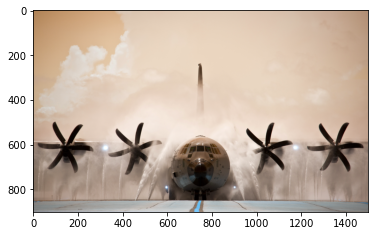

In [4]:
plt.imshow(img_array[1869], cmap='gray')  # graph it
plt.show()  # display!

In [5]:
import random
# shuffle our training data
random.shuffle(training_data)

In [6]:
for sample in training_data[:10]:
    print(sample[1])
# Just a quick peek on our shuffled data
# The reason we do this is so that our algorithm can properly learn the images, if they were sequential the 
# the model would get easily confused and have incorrect weights and might not reach optimality

5
2
0
4
0
4
1
1
2
2


In [7]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

#print(X[0][:].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

In [8]:
# Normalize the data
X = X/255.0

# Split the data into train, valid, and test sets into 70-20-10 split , X_valid, X_test 
X_train, y_train = X[0:5956], y[0:5956]
X_valid, y_valid = X[5956:7658], y[5956:7658]
X_test, y_test = X[7658:8510], y[7658:8510]

### Model 1

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential()
# Layer 1
model.add(Conv2D(128, (3, 3), activation = 'relu', input_shape=(IMG_SIZE,IMG_SIZE,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(layers.BatchNormalization())
# Layer 2
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(layers.BatchNormalization())
# Layer 3
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(layers.BatchNormalization())
# Layer 4
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(layers.BatchNormalization())
# Layer 5
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(layers.BatchNormalization())
# Layer 6
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
# Layer 7
model.add(Dense(256, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=keras.regularizers.l2(0.5)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))
# Layer 8
model.add(Dense(256, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=keras.regularizers.l2(0.5)))
model.add(layers.Dropout(0.4))
# Layer 9
model.add(Dense(6))
model.add(Activation('relu'))

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='RMSProp',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 78, 78, 128)       1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 39, 39, 128)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 39, 39, 128)       512       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 37, 37, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 12, 12, 128)       512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       1

In [38]:
model1_history = model.fit(X_train, y_train, batch_size=128, epochs=20,
                                   verbose=1, validation_data=(X_valid, y_valid))

Train on 5956 samples, validate on 1702 samples
Epoch 1/20
5956/5956 [==============================] - 58s 10ms/sample - loss: 0.6094 - accuracy: 0.9303 - val_loss: 1.9487 - val_accuracy: 0.4083
Epoch 2/20
5956/5956 [==============================] - 54s 9ms/sample - loss: 0.6007 - accuracy: 0.9224 - val_loss: 2.3791 - val_accuracy: 0.3666
Epoch 3/20
5956/5956 [==============================] - 55s 9ms/sample - loss: 0.5730 - accuracy: 0.9211 - val_loss: 1.6760 - val_accuracy: 0.4483
Epoch 4/20
5956/5956 [==============================] - 54s 9ms/sample - loss: 0.5438 - accuracy: 0.9238 - val_loss: 1.6932 - val_accuracy: 0.4360
Epoch 5/20
5956/5956 [==============================] - 55s 9ms/sample - loss: 0.5393 - accuracy: 0.9246 - val_loss: 1.7211 - val_accuracy: 0.4548
Epoch 6/20
5956/5956 [==============================] - 55s 9ms/sample - loss: 0.5035 - accuracy: 0.9243 - val_loss: 1.7078 - val_accuracy: 0.4307
Epoch 7/20
5956/5956 [==============================] - 55s 9ms/sampl

### Model 2

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model2 = Sequential()

model2.add( Conv2D(128, (3,3), activation = 'relu', input_shape=(IMG_SIZE,IMG_SIZE,1)))
model2.add( Conv2D(128, (3,3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model.add(layers.BatchNormalization())

model2.add( Conv2D(128, (3,3), activation = 'relu'))
model2.add( Conv2D(128, (3,3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model.add(layers.BatchNormalization())

model2.add(Flatten())

model2.add(Dense(256, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=keras.regularizers.l2(0.003)))
model2.add(Dropout(0.3))

model2.add(Dense(256, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=keras.regularizers.l2(0.003)))
model2.add(Dropout(0.5))

model2.add(Dense(6))
model2.add(Activation('softmax'))

model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 78, 78, 128)       1280      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 76, 76, 128)       147584    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 38, 38, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 36, 36, 128)       147584    
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 128)       147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)            

In [12]:
model2_history = model2.fit(X_train, y_train, batch_size=128, epochs=40,
                                   verbose=1, validation_data=(X_valid, y_valid))

Train on 5956 samples, validate on 1702 samples
Epoch 1/40
5956/5956 [==============================] - 167s 28ms/sample - loss: 2.4282 - accuracy: 0.2085 - val_loss: 2.0301 - val_accuracy: 0.2156
Epoch 2/40
5956/5956 [==============================] - 164s 28ms/sample - loss: 1.9454 - accuracy: 0.2295 - val_loss: 1.8971 - val_accuracy: 0.2509
Epoch 3/40
5956/5956 [==============================] - 164s 27ms/sample - loss: 1.8607 - accuracy: 0.2550 - val_loss: 1.8387 - val_accuracy: 0.2556
Epoch 4/40
5956/5956 [==============================] - 164s 27ms/sample - loss: 1.8170 - accuracy: 0.2693 - val_loss: 1.8279 - val_accuracy: 0.2538
Epoch 5/40
5956/5956 [==============================] - 164s 28ms/sample - loss: 1.7965 - accuracy: 0.2807 - val_loss: 1.7789 - val_accuracy: 0.3043
Epoch 6/40
5956/5956 [==============================] - 164s 27ms/sample - loss: 1.7818 - accuracy: 0.2994 - val_loss: 1.7640 - val_accuracy: 0.3296
Epoch 7/40
5956/5956 [==============================] - 16

### Model 3

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model3 = Sequential()

model3.add( Conv2D(128, (3,3), activation = 'relu', input_shape=(IMG_SIZE,IMG_SIZE,1)))
model3.add( Conv2D(128, (3,3), activation = 'relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add( Conv2D(128, (3,3), activation = 'relu'))
model3.add( Conv2D(128, (3,3), activation = 'relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Flatten())

model3.add(Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.0005)))
model3.add(Dropout(0.5))

model3.add(Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.0005)))
model3.add(Dropout(0.5))

model3.add(Dense(6))
model3.add(Activation('softmax'))

model3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 78, 78, 128)       1280      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 76, 76, 128)       147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 38, 38, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 36, 36, 128)       147584    
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 34, 34, 128)       147584    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 36992)            

In [14]:
model3_history = model3.fit(X_train, y_train, batch_size=256, epochs=40,
                                   verbose=1, validation_data=(X_valid, y_valid))

Train on 5956 samples, validate on 1702 samples
Epoch 1/40
5956/5956 [==============================] - 172s 29ms/sample - loss: 2.0163 - accuracy: 0.2163 - val_loss: 1.8793 - val_accuracy: 0.2156
Epoch 2/40
5956/5956 [==============================] - 165s 28ms/sample - loss: 1.8434 - accuracy: 0.2280 - val_loss: 1.8064 - val_accuracy: 0.2532
Epoch 3/40
5956/5956 [==============================] - 165s 28ms/sample - loss: 1.8101 - accuracy: 0.2626 - val_loss: 1.8106 - val_accuracy: 0.2573
Epoch 4/40
5956/5956 [==============================] - 165s 28ms/sample - loss: 1.8044 - accuracy: 0.2717 - val_loss: 1.8075 - val_accuracy: 0.2761
Epoch 5/40
5956/5956 [==============================] - 165s 28ms/sample - loss: 1.7877 - accuracy: 0.2901 - val_loss: 1.7637 - val_accuracy: 0.3249
Epoch 6/40
5956/5956 [==============================] - 165s 28ms/sample - loss: 1.7867 - accuracy: 0.3155 - val_loss: 1.7614 - val_accuracy: 0.3484
Epoch 7/40
5956/5956 [==============================] - 16

### Plotting the Models' Results

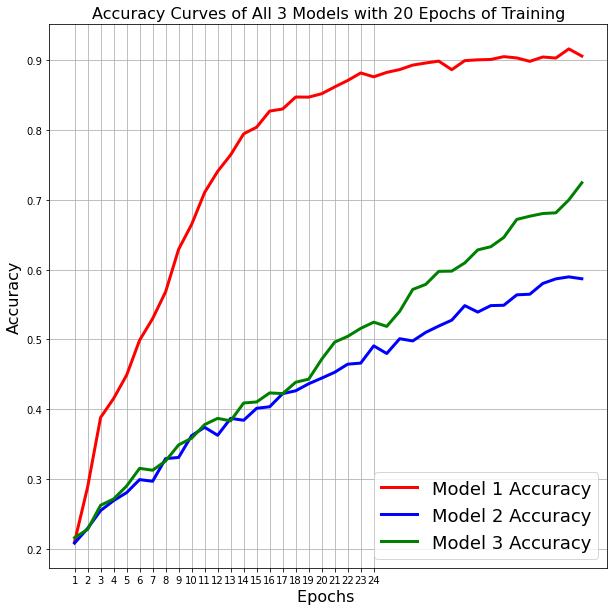

In [15]:
# Plotting all 3 models accuracy scores
plt.figure(figsize=[10,10])
plt.plot(model1.history['accuracy'], 'r', linewidth=3.0)
plt.plot(model2.history['accuracy'],'b',linewidth=3.0)
plt.plot(model3.history['accuracy'],'g',linewidth=3.0)
plt.legend(['Model 1 Accuracy', 'Model 2 Accuracy', 'Model 3 Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.xticks([i for i in range(0,40)],[i for i in range(1,41)])
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves of All 3 Models with 20 Epochs of Training',fontsize=16)
plt.grid()

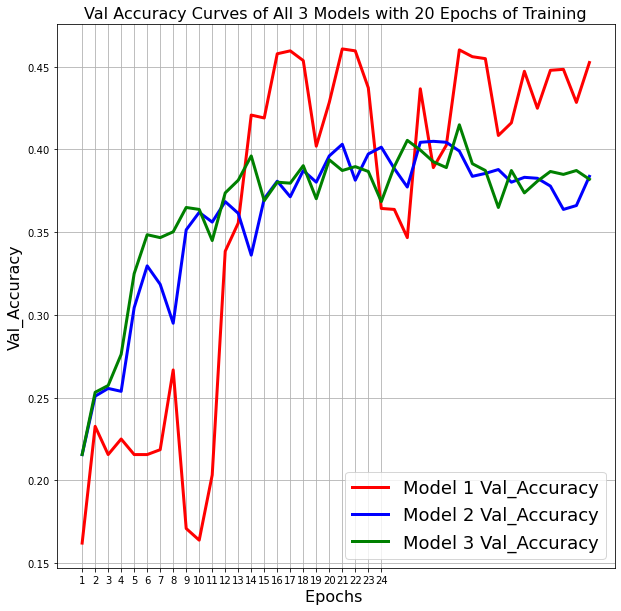

In [16]:
# Plotting all 3 models val accuracy scores
plt.figure(figsize=[10,10])
plt.plot(model1_history.history['val_accuracy'], 'r', linewidth=3.0)
plt.plot(model2_history.history['val_accuracy'],'b',linewidth=3.0)
plt.plot(model3_history.history['val_accuracy'],'g',linewidth=3.0)
plt.legend(['Model 1 Val_Accuracy', 'Model 2 Val_Accuracy', 'Model 3 Val_Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.xticks([i for i in range(0,40)],[i for i in range(1,41)])
plt.ylabel('Val_Accuracy',fontsize=16)
plt.title('Val Accuracy Curves of All 3 Models with 20 Epochs of Training',fontsize=16)
plt.grid()

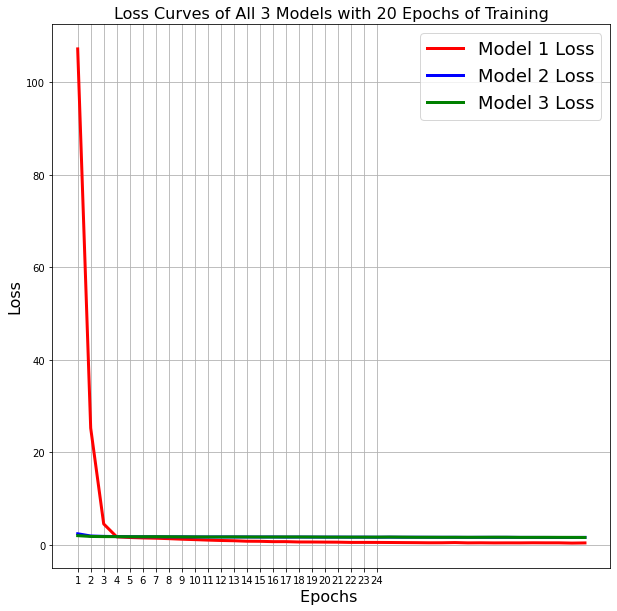

In [17]:
# Plotting all 3 models training losses
plt.figure(figsize=[10,10])
plt.plot(model1_history.history['loss'], 'r', linewidth=3.0)
plt.plot(model2_history.history['loss'],'b',linewidth=3.0)
plt.plot(model3_history.history['loss'],'g',linewidth=3.0)
plt.legend(['Model 1 Loss', 'Model 2 Loss', 'Model 3 Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.xticks([i for i in range(0,24)],[i for i in range(1,25)])
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves of All 3 Models with 20 Epochs of Training',fontsize=16)
plt.grid()

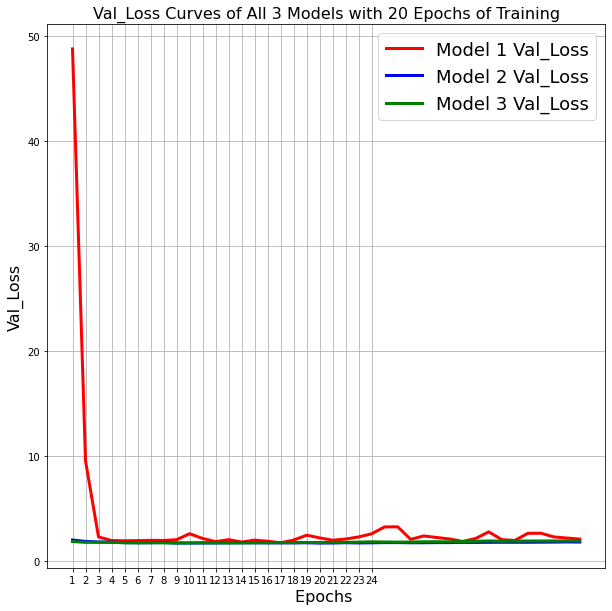

In [18]:
# Plotting Val Loss Curves for all 3 Models
plt.figure(figsize=[10,10])
plt.plot(model1_history.history['val_loss'], 'r', linewidth=3.0)
plt.plot(model2_history.history['val_loss'],'b',linewidth=3.0)
plt.plot(model3_history.history['val_loss'],'g',linewidth=3.0)
plt.legend(['Model 1 Val_Loss', 'Model 2 Val_Loss', 'Model 3 Val_Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.xticks([i for i in range(0,24)],[i for i in range(1,25)])
plt.ylabel('Val_Loss',fontsize=16)
plt.title('Val_Loss Curves of All 3 Models with 20 Epochs of Training',fontsize=16)
plt.grid()

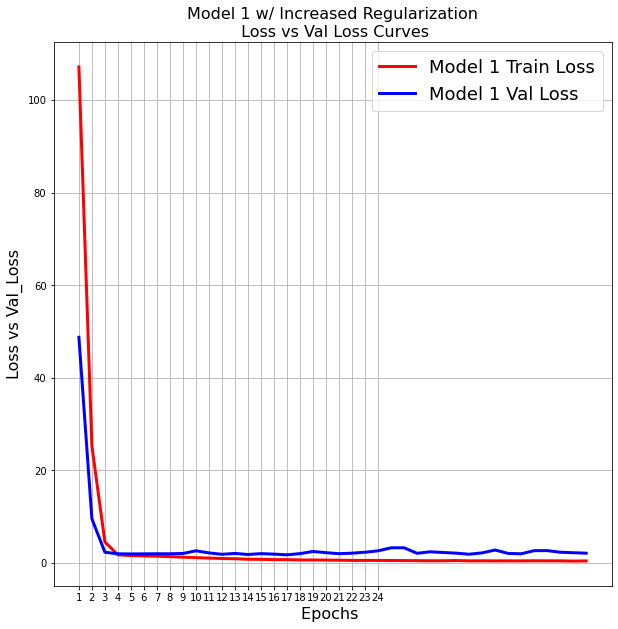

In [19]:
# Plotting Model 1's losses
plt.figure(figsize=[15,10])
plt.plot(model1_history.history['loss'], 'r', linewidth=3.0)
plt.plot(model1_history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Model 1 Train Loss', 'Model 1 Val Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.xticks([i for i in range(0,24)],[i for i in range(1,25)])
plt.ylabel('Loss vs Val_Loss',fontsize=16)
plt.title('Model 1 w/ Increased Regularization\n Loss vs Val Loss Curves',fontsize=16)
plt.grid()

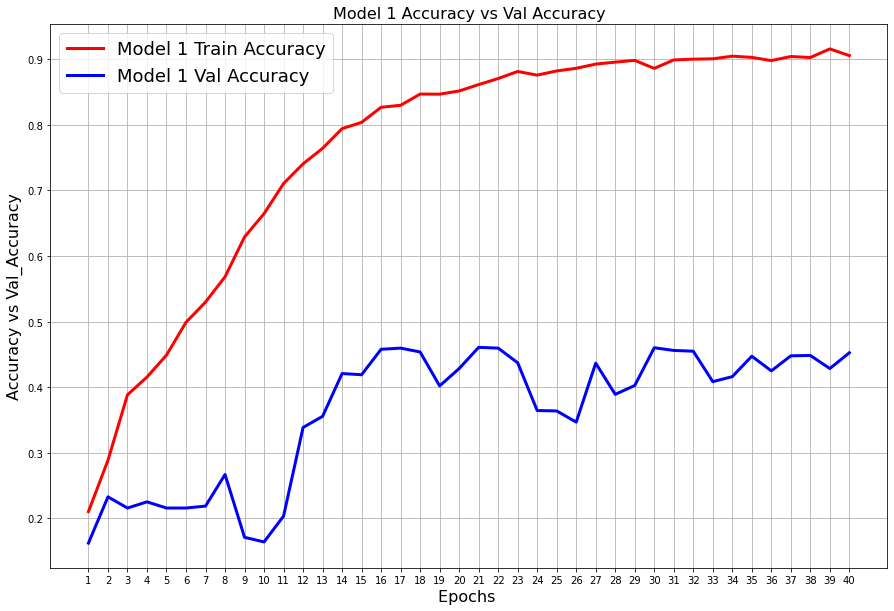

In [34]:
# Plotting Model 1's Accuracies
plt.figure(figsize=[15,10])
plt.plot(model1_history.history['accuracy'], 'r', linewidth=3.0)
plt.plot(model1_history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Model 1 Train Accuracy', 'Model 1 Val Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.xticks([i for i in range(0,40)],[i for i in range(1,41)])
plt.ylabel('Accuracy vs Val_Accuracy',fontsize=16)
plt.title('Model 1 Accuracy vs Val Accuracy',fontsize=16)
plt.grid()

It seems that our first model is suffering from overfitting the data

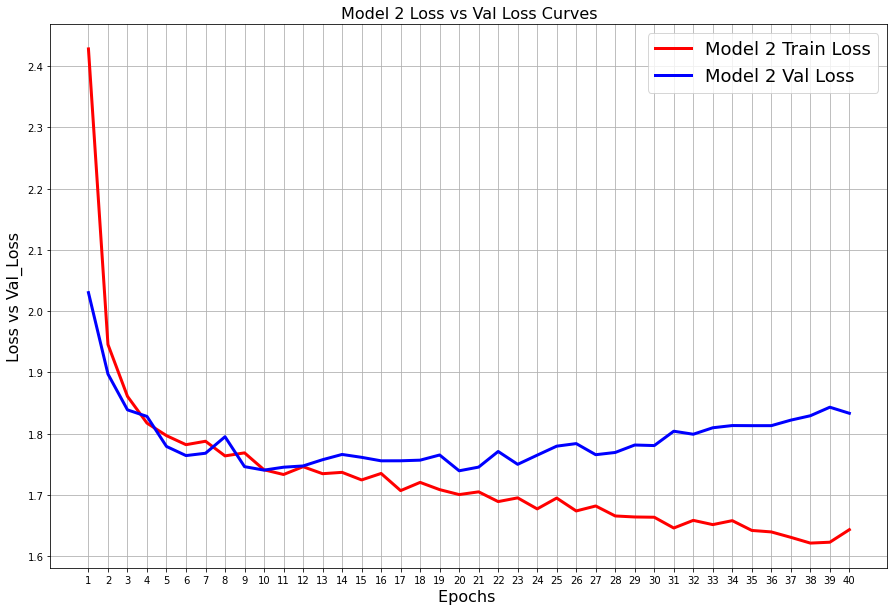

In [28]:
# Plotting Model 2's losses
plt.figure(figsize=[15,10])
plt.plot(model2_history.history['loss'], 'r', linewidth=3.0)
plt.plot(model2_history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Model 2 Train Loss', 'Model 2 Val Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.xticks([i for i in range(0,40)],[i for i in range(1,41)])
plt.ylabel('Loss vs Val_Loss',fontsize=16)
plt.title('Model 2 Loss vs Val Loss Curves',fontsize=16)
plt.grid()

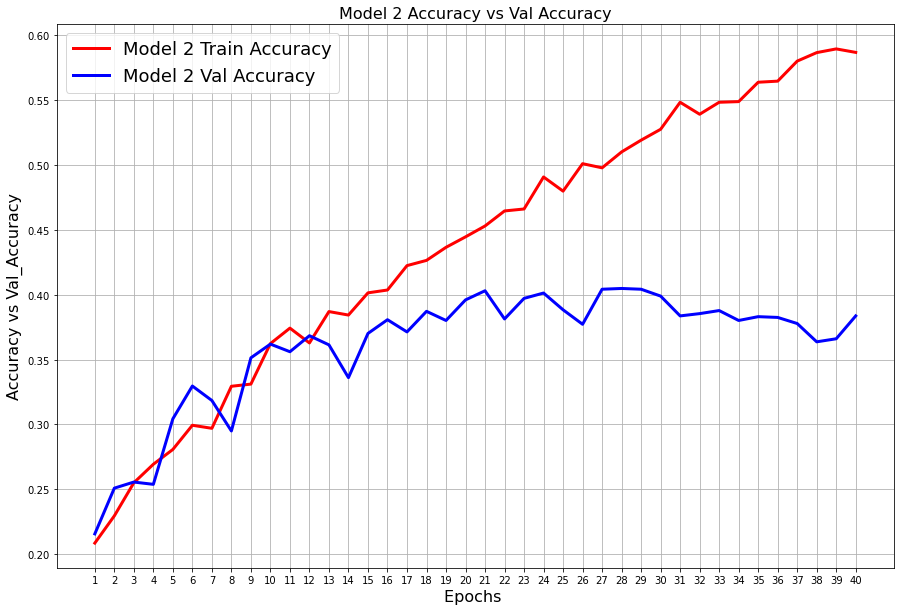

In [33]:
# Plotting Model 2's Accuracies
plt.figure(figsize=[15,10])
plt.plot(model2_history.history['accuracy'], 'r', linewidth=3.0)
plt.plot(model2_history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Model 2 Train Accuracy', 'Model 2 Val Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.xticks([i for i in range(0,40)],[i for i in range(1,41)])
plt.ylabel('Accuracy vs Val_Accuracy',fontsize=16)
plt.title('Model 2 Accuracy vs Val Accuracy',fontsize=16)
plt.grid()

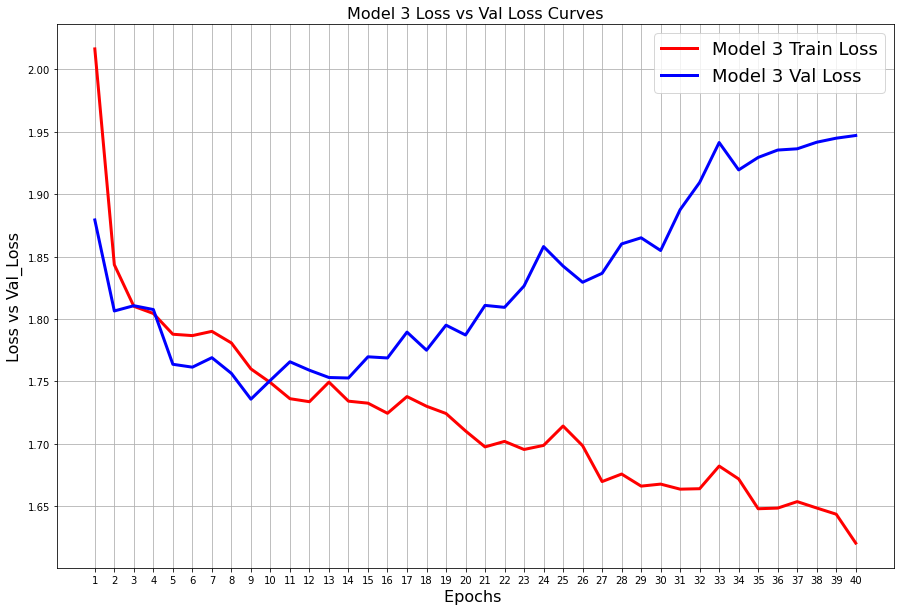

In [30]:
# Plotting Model 3's losses
plt.figure(figsize=[15,10])
plt.plot(model3_history.history['loss'], 'r', linewidth=3.0)
plt.plot(model3_history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Model 3 Train Loss', 'Model 3 Val Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.xticks([i for i in range(0,40)],[i for i in range(1,41)])
plt.ylabel('Loss vs Val_Loss',fontsize=16)
plt.title('Model 3 Loss vs Val Loss Curves',fontsize=16)
plt.grid()

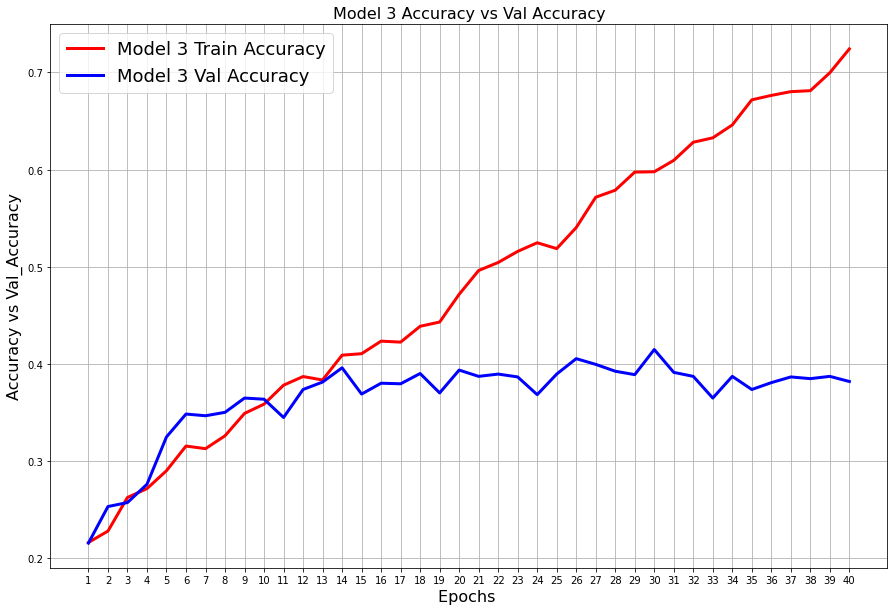

In [32]:
# Plotting Model 3's Accuracies
plt.figure(figsize=[15,10])
plt.plot(model3_history.history['accuracy'], 'r', linewidth=3.0)
plt.plot(model3_history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Model 3 Train Accuracy', 'Model 3 Val Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.xticks([i for i in range(0,40)],[i for i in range(1,41)])
plt.ylabel('Accuracy vs Val_Accuracy',fontsize=16)
plt.title('Model 3 Accuracy vs Val Accuracy',fontsize=16)
plt.grid()

## Plotting Confusion Matrix and Performance Curves for Model 1

In [60]:
# Get our predictions of our test set
model1_y_pred = model.predict(X_test)

In [62]:
# Process the predictions for our confusion matrix by taking the max probability
y_pred = []
for i in range(len(model1_y_pred)):
    y_pred.append(np.argmax(model1_y_pred[i]))

In [ ]:
["drone", "fighter-jet", "helicopter", "missile", "passenger-plane", "rocket"]

<AxesSubplot:title={'center':'Model 1 Confusion Matrix'}>

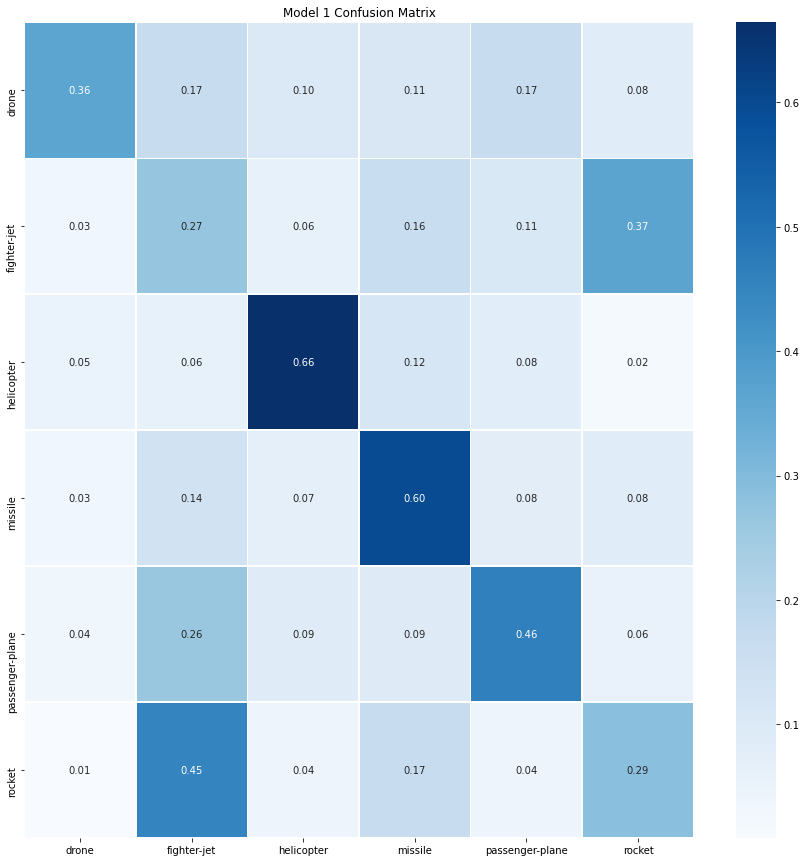

In [82]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
import seaborn as sns

cm = confusion_matrix(y_test, y_pred) 
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(15,15))
plt.title('Model 1 Confusion Matrix')
sns.heatmap(cmn, annot=True, fmt=".2f", linewidths=.5, cmap="Blues", yticklabels = CATEGORIES, xticklabels = CATEGORIES)

In [83]:
print(classification_report(y_test, y_pred, target_names=CATEGORIES))

                 precision    recall  f1-score   support

          drone       0.63      0.36      0.46       118
    fighter-jet       0.26      0.27      0.26       178
     helicopter       0.66      0.66      0.66       146
        missile       0.50      0.60      0.55       154
passenger-plane       0.49      0.46      0.48       140
         rocket       0.25      0.29      0.27       115

       accuracy                           0.44       851
      macro avg       0.46      0.44      0.45       851
   weighted avg       0.46      0.44      0.45       851



In [97]:
from sklearn import preprocessing
from scipy import interp
from itertools import cycle

n_classes = len(CATEGORIES)
lb = preprocessing.LabelBinarizer()
lb.fit(y_test)
y_true = lb.transform(y_test)
y_pred = lb.transform(y_pred)

lw = 5

C:\Users\Aaron\anaconda3\envs\DeepLearning\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


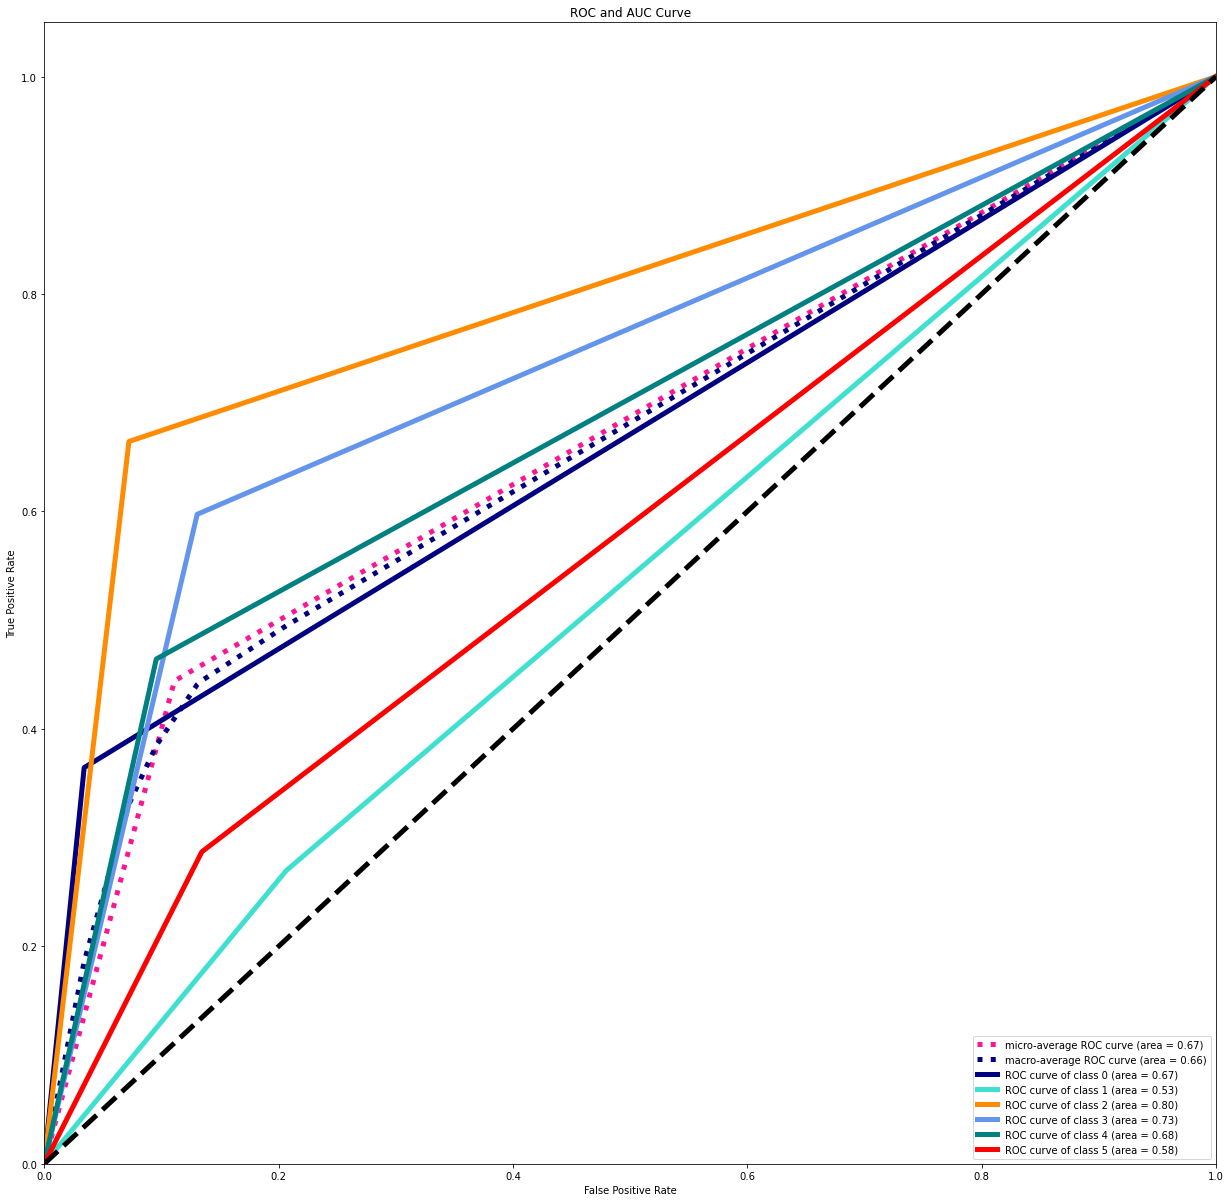

ROC_AUC_Score: 0.6644502511918923


In [100]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_pred[:,i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(21,21))
    plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=lw)

    plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=lw)

    colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'green', 'brown', 'purple'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
            label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC and AUC Curve')
    plt.legend(loc="lower right")
    plt.show()
        
    return roc_auc_score(y_test, y_pred, average=average)

print("ROC_AUC_Score:", multiclass_roc_auc_score(y_true, y_pred))

In [101]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
    
# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_true[:, i],
                                                        y_pred[:, i])
    average_precision[i] = average_precision_score(y_true[:, i], y_pred[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_true.ravel(),
    y_pred.ravel())
average_precision["micro"] = average_precision_score(y_true, y_pred,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.29


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.29')

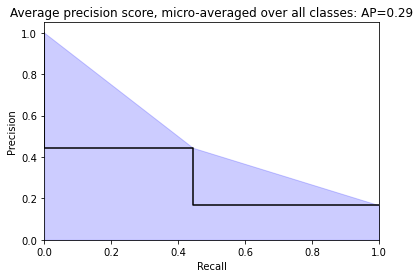

In [102]:
plt.figure()
plt.step(recall['micro'], precision['micro'], color='black', alpha=1.0,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='blue')#,
                 #**step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

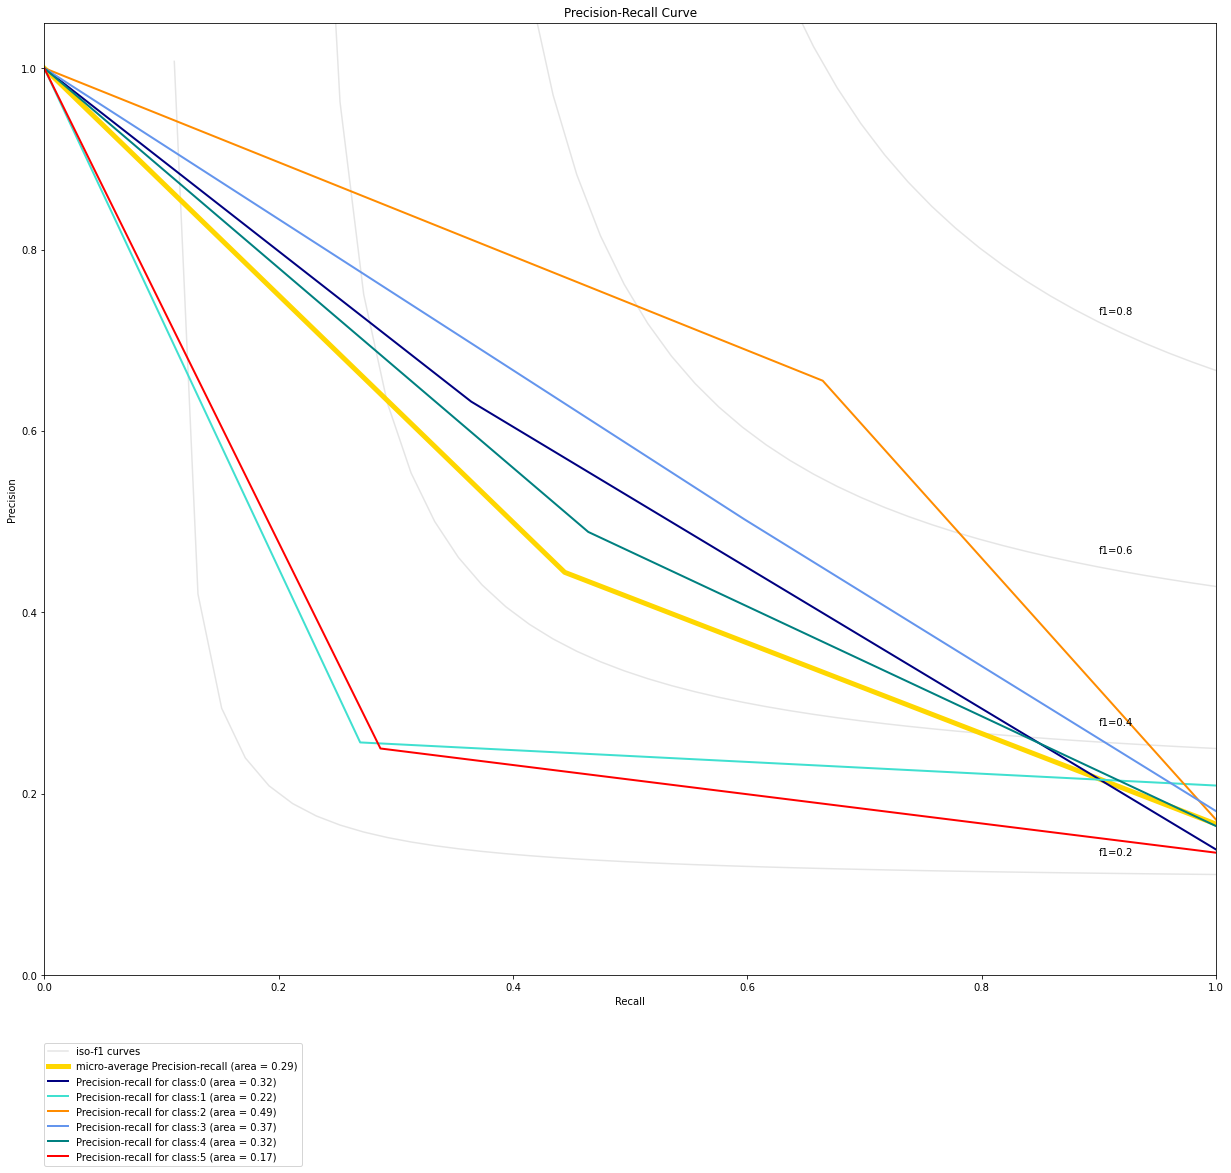

In [103]:
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'green', 'brown', 'purple'])

plt.figure(figsize=(21, 21))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=lw)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class:{0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(lines, labels, loc=(0, -.2), prop=dict(size=10))


plt.show()